# Notebook 1 - Anisotropic Model

- This notebook demonstrates the bayesian statistical analysis preformed Antikythera Calender the using the anisotropic model $(\sigma_r, \sigma_t)$
- It also acts as the main tutorial page, explaining the packages functionalities and justifyng the packages stucture

In [3]:
# Import necessary libraries
from calender_analysis import Calender_Analysis 
# ------------------ Data ------------------
original_data_path = "data/Hole_Measurements.csv"  

## Initialising the Models
The data analysis is preformed within a class based structure called **Calender_Analysis**

### Model Type Selection

The model can operate in one of two modes:

| **Model Type**       | **Description**                                                        |
|----------------------|------------------------------------------------------------------------|
| **Isotropic Model**  | Assumes a single $\sigma$ parameter for uncertainty in both x and y directions. |
| **Anisotropic Model** | Uses separate $\sigma_r$ (radial) and $\sigma_t$ (tangential) parameters. |

### Dataset Filtering

The input dataset can be optionally filtered to remove unreliable sections.

This can be done to reduce the dimensionality of the model, without loosing information (data that constrains) on a given paramter. 

**The Majority of this pipeline using the Basic filter, justification of which is provided in a seperate notebook.**

| **Filtering Mode** | **Description** | **No. Sections** | **No. Holes** |
|--------------------|----------------|------------------|--------------|
| **None**  | No filtering applied. | 8 | 81 |
| **Basic** | Removes sections with only one hole. | 6 | 79 |
| **Full**  | Removes sections with fewer than three holes and discards the first and last hole in each section. | 4 | 66 |

### Default Priors

If no priors are provided, the model assigns reasonable default priors:
| **Parameter**       | **Description**                        | **Distribution**         |
|---------------------|----------------------------------------|--------------------------|
| **$N$**              | Total number of holes                  | Uniform(340, 370)       |
| **$r$**              | Ring radius                            | Uniform(65, 85)         |
| **$x_0$**         | Section offsets (x dim)                      | Normal(80, 5) |
| **$y_0$**         | Section offsets  (y dim)                    | Normal(135, 5) |
| **$\alpha$**              | Angular offsets                       | Normal(-2.5, 1)         |
| **$Errors$**    | **Isotropic**                          | **σ** ~ Uniform(0, 5)   |
|                   | **Anisotropic**                        | **$σ_r$** ~ Uniform(0, 5), **$σ_t$** ~ Uniform(0, 5) |


### Plotting observed data for `Filtering = None`

In [5]:
Antikythera_Anisotropic_No_Filter = Calender_Analysis(data = original_data_path, model_type = "anisotropic", filtering = 'None', priors = None, num_cores = 4)

2025-03-10 23:36:42,157 - INFO - JAX Detected Devices: 8
2025-03-10 23:36:42,158 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-10 23:36:42,167 - INFO -  
        DATA SUMMARY
Total Sections   : 8
Total Holes      : 81
---------------------------------
Section ID   |   Hole Range 
--------------------------------- 
      0      |   1 - 1
      1      |   2 - 23
      2      |   24 - 32
      3      |   33 - 69
      4      |   70 - 70
      5      |   71 - 73
      6      |   74 - 75
      7      |   76 - 81 
--------------------------------- 


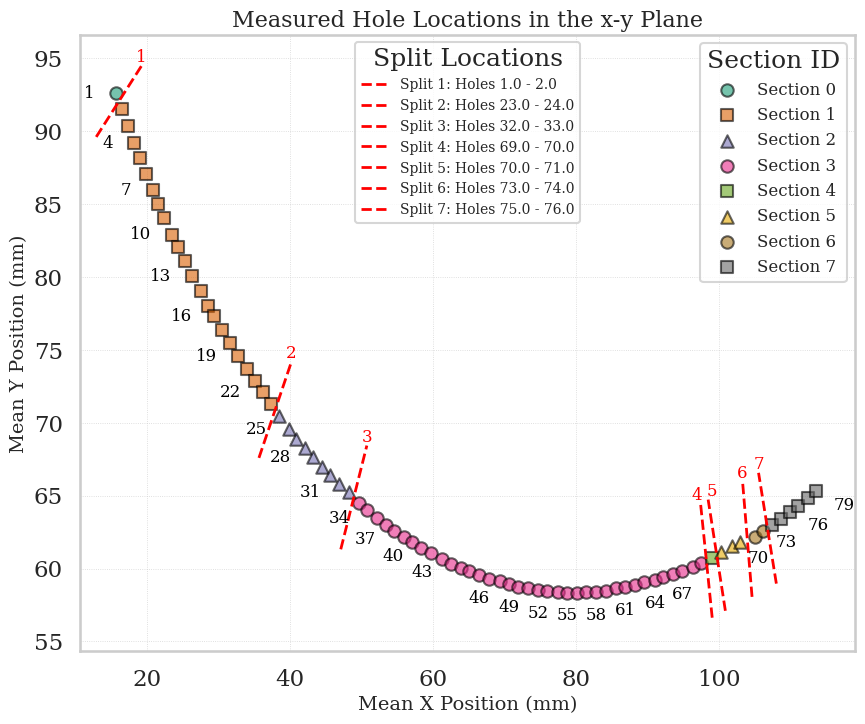

In [6]:
Antikythera_Anisotropic_No_Filter.plot_hole_locations()

### Plotting observed data for `Filtering = Basic`

In [8]:
Antikythera_Anisotropic_Basic_Filter = Calender_Analysis(data = original_data_path, model_type = "anisotropic", filtering = 'Basic', priors = None, num_cores = 4)

2025-03-10 23:38:04,222 - INFO - JAX Detected Devices: 8
2025-03-10 23:38:04,224 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-10 23:38:04,233 - INFO -  
        DATA SUMMARY
Total Sections   : 6
Total Holes      : 79
---------------------------------
Section ID   |   Hole Range 
--------------------------------- 
      1      |   2 - 23
      2      |   24 - 32
      3      |   33 - 69
      4      |   71 - 73
      5      |   74 - 75
      6      |   76 - 81 
--------------------------------- 


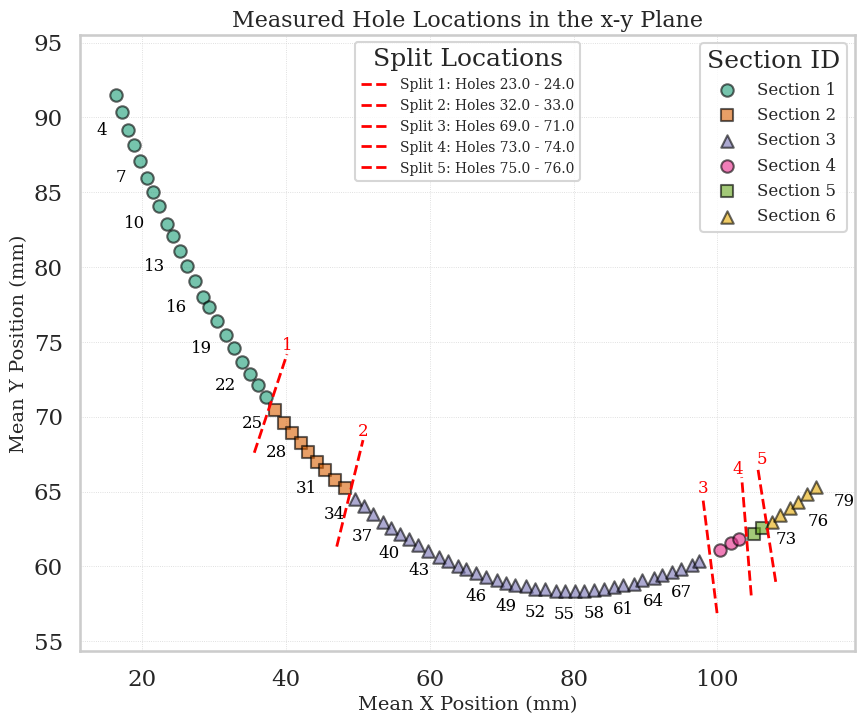

In [9]:
Antikythera_Anisotropic_Basic_Filter.plot_hole_locations()

### Plotting observed data for `Filtering = Full`

In [12]:
Antikythera_Anisotropic_Full_Filter = Calender_Analysis(data = original_data_path, model_type = "anisotropic", filtering = 'Full', priors = None, num_cores = 4)

2025-03-10 23:40:02,551 - INFO - JAX Detected Devices: 8
2025-03-10 23:40:02,552 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-10 23:40:02,589 - INFO -  
        DATA SUMMARY
Total Sections   : 4
Total Holes      : 66
---------------------------------
Section ID   |   Hole Range 
--------------------------------- 
      1      |   3 - 22
      2      |   25 - 31
      3      |   34 - 68
      4      |   77 - 80 
--------------------------------- 


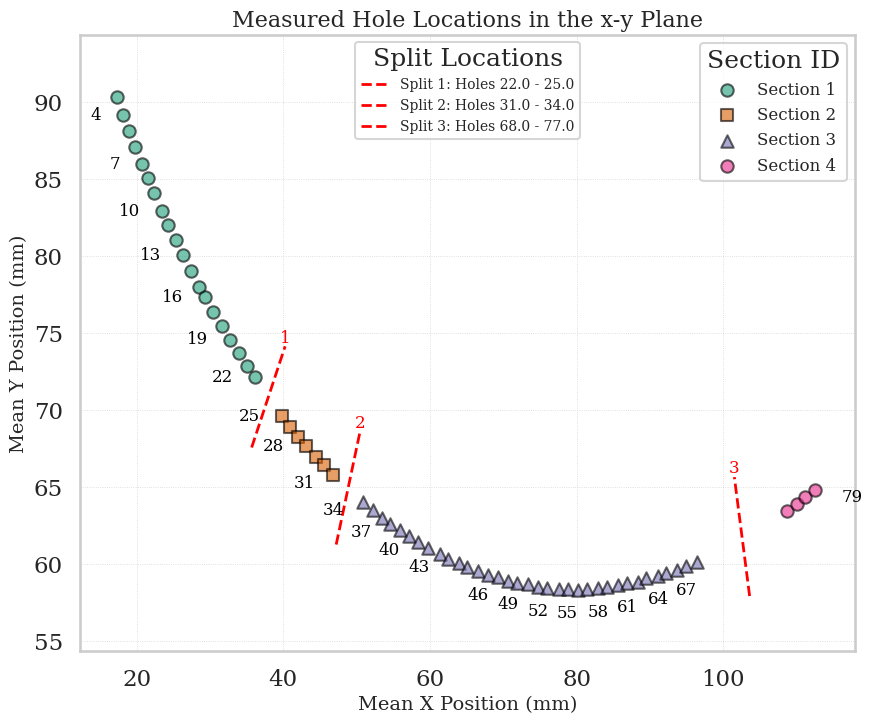

In [13]:
Antikythera_Anisotropic_Full_Filter.plot_hole_locations()

2025-03-10 22:00:44,969 - INFO - Running HMC to generate posterior samples, aiming for 1000...
2025-03-10 22:00:44,970 - INFO - Running MCMC with Optimised Hyperparameters: step_size=1.0, accept_prob=0.9, dense_mass=False
Due to Autocorrelation Length: 2, the number of effective samples is reduced.
Total samples required to achieve 1000 effective samples: 2000
This is run on 4 parrallel chains each running 500 samples.


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

2025-03-10 22:01:51,258 - INFO - Total MCMC Run Time: 66.29 seconds 
 Non Burn-In Run Time: 13.26 seconds
2025-03-10 22:01:53,207 - INFO -  Over 4 chains, 2000 were run, 
Achieved Gelman-Rubin Statistic: 1.0928, 
Achieved Effective Samples: 1478, 
True Auto-correlation Length: 2
2025-03-10 22:01:53,209 - INFO - Total samples remaining after thinning: 1000
2025-03-10 22:01:53,210 - INFO - Generating 10000 prior samples ...
2025-03-10 22:01:54,012 - INFO - Posterior Conditional Probability, Prior(sigma_r = sigma_t), generated to be: 0.00000
2025-03-10 22:01:54,014 - INFO - Prior Conditional Probability, Posterior(sigma_r = sigma_t), generated to be: 0.18351
2025-03-10 22:01:54,014 - INFO - Savage-Dickey Ratio: 0.00000


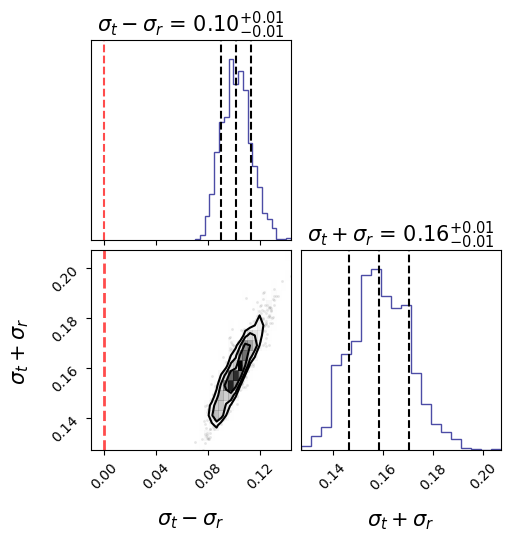

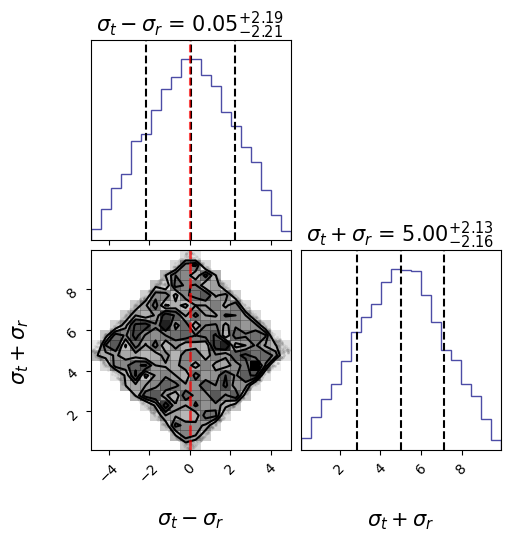

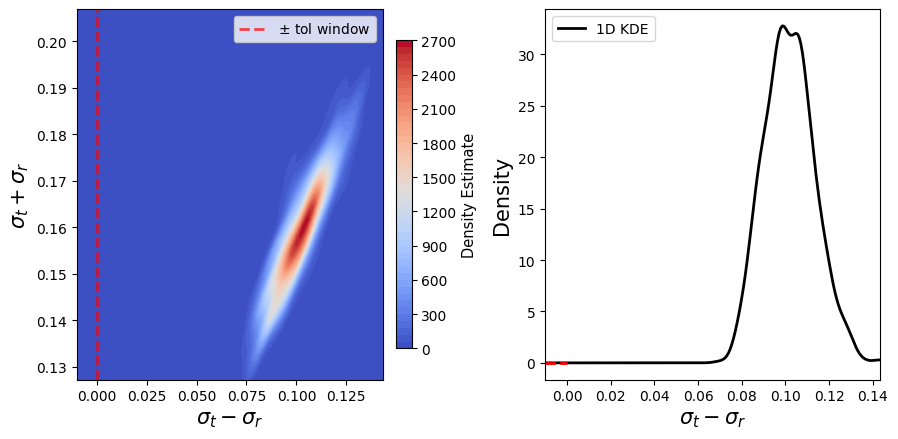

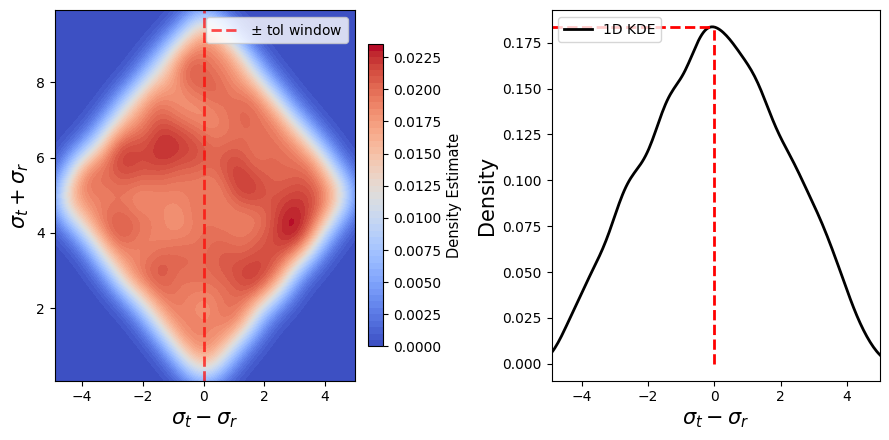

In [2]:
best_params = {'Step Size': 1.0, 'Acceptance Probability': 0.9, 'Dense Mass Matrix': False, 'Autocorrolation Length': 1.8840452471041447, 'Number Effective Samples': 1061.5456306445308, 'GR Statistic': 1.002272325030495, 'Time per iteration': 0.01623126657803853, 'Time per Effective Sample': 0.03058044065083385}
results = model.savage_dickey_comparison( best_params, burnin_period=2000, n_samples_posterior=1000, n_samples_prior=10000, random_seed=0, tol=0.01, show_plots=True)

/var/folders/ps/rqln7sh519b4cnjyq2mm94s40000gn/T/ipykernel_17097/1306274689.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes_corner[0, 0].legend(loc=config["legend_loc"])


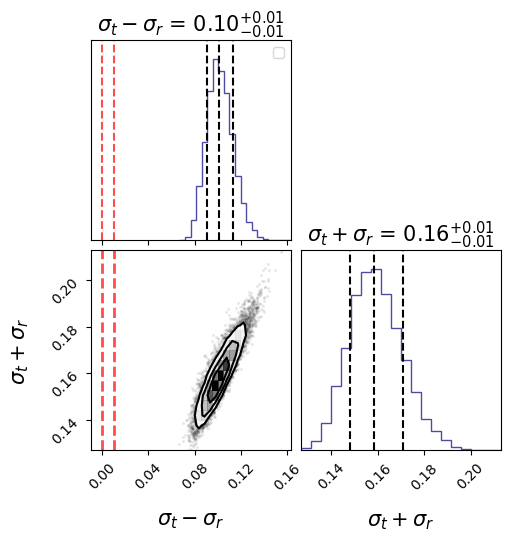

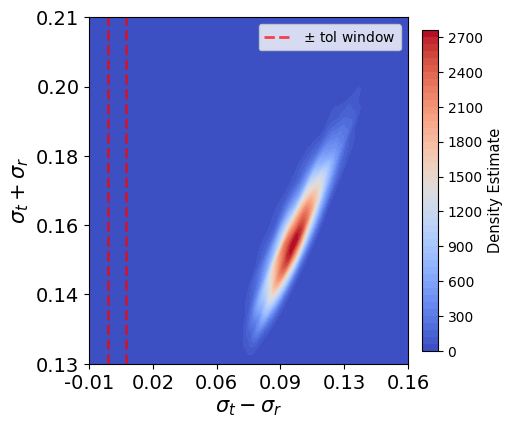

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy.stats import gaussian_kde

# === Configuration Dictionary ===
config = {
    "figsize_corner": (6, 6),  # Full-size corner plot
    "figsize_kde": (4.5, 4.5),  # KDE plot scaled 30% smaller
    "font_size": 15,  # Font size for labels, ticks, and titles
    "tick_size": 14,  # Tick label size
    "hist_color": "navy",  # Histogram color in corner plot
    "hist_alpha": 0.7,  # Transparency of histograms
    "cmap": "coolwarm",  # Colormap for KDE plot
    "kde_levels": 50,  # Number of contour levels in KDE
    "tol": 0.01,  # Tolerance window
    "line_color": "red",  # Color for tolerance lines
    "line_style": "dashed",  # Style of tolerance lines
    "line_alpha": 0.7,  # Transparency of tolerance lines
    "legend_loc": "best",  # Legend location
    "colorbar_label": "Density Estimate",  # Label for KDE colorbar
}

# Stack into (N, 2) shape for visualization
samples_transformed = np.vstack([X, Y]).T

# Get the data range for sigma_t - sigma_r
x_min, x_max = X.min(), X.max()
y_min, y_max = Y.min(), Y.max()
x_extended_min = min(x_min, -config["tol"])
x_extended_max = max(x_max, config["tol"])

# === Corner Plot with `tick_kwargs` Fix ===
corner_fig = corner.corner(
    samples_transformed,
    labels=[r"$\sigma_t - \sigma_r$", r"$\sigma_t + \sigma_r$"],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_fmt=".2f",
    label_kwargs={"fontsize": config["font_size"]}, 
    title_kwargs={"fontsize": config["font_size"]},
    tick_kwargs={"labelsize": config["tick_size"]}, 
    hist_kwargs={"color": config["hist_color"], "alpha": config["hist_alpha"]},
    figsize=config["figsize_corner"]
)

# Extract axes for modifying
axes_corner = np.array(corner_fig.axes).reshape(2, 2)

# Overlay tolerance lines on the histograms and scatter plots
ax = axes_corner[0, 0]  # Histogram of σ_t - σ_r
ax.axvline(0, color=config["line_color"], linestyle=config["line_style"], alpha=config["line_alpha"])
ax.axvline(config["tol"], color=config["line_color"], linestyle=config["line_style"], alpha=config["line_alpha"])
ax.set_xlim(x_extended_min, x_extended_max)

ax = axes_corner[1, 0]  # 2D scatter plot
ax.axvline(0, color=config["line_color"], linestyle=config["line_style"], alpha=config["line_alpha"], label=r"$\pm$ tol window", lw = 2)
ax.axvline(config["tol"], color=config["line_color"], linestyle=config["line_style"], alpha=config["line_alpha"], lw = 2)
ax.set_xlim(x_extended_min, x_extended_max)

axes_corner[0, 0].legend(loc=config["legend_loc"])

plt.show()


# === KDE Contour Plot (30% Smaller) ===
fig_kde = plt.figure(figsize=config["figsize_kde"])  # Reduce size by 30%

# Perform KDE
kde = gaussian_kde(samples_transformed.T)  # KDE expects (2, N) shape

# Create a high-resolution grid
x_grid = np.linspace(x_extended_min, x_extended_max, 200)
y_grid = np.linspace(y_min, y_max, 200)
X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X_mesh.ravel(), Y_mesh.ravel()])

# Evaluate KDE
density_values = kde(positions).reshape(X_mesh.shape)

# Improved KDE Contour Plot
ax = fig_kde.add_subplot(111)
contour = ax.contourf(X_mesh, Y_mesh, density_values, levels=config["kde_levels"], cmap=config["cmap"])

# Add **dotted** vertical lines at ±tol for visibility
ax.axvline(x=0, color=config["line_color"], linestyle=config["line_style"], alpha=config["line_alpha"], label=r"$\pm$ tol window", lw = 2)
ax.axvline(x=config["tol"], color=config["line_color"], linestyle=config["line_style"], alpha=config["line_alpha"], lw = 2)

# Set labels with font size from config
ax.set_xlabel(r"$\sigma_t - \sigma_r$", fontsize=config["font_size"])
ax.set_ylabel(r"$\sigma_t + \sigma_r$", fontsize=config["font_size"])

# Add colorbar for better interpretation of density
cbar = plt.colorbar(contour, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label(config["colorbar_label"], fontsize=config["font_size"]*0.7)

# Ensure the x-axis includes the tolerance window
ax.set_xlim(x_extended_min, x_extended_max)
ax.set_ylim(y_min, y_max)

# === Fix Ticks and Labels ===
# Manually set tick locations (ensure they match the range)
x_ticks = np.linspace(x_extended_min, x_extended_max, num=6)
y_ticks = np.linspace(y_min, y_max, num=6)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Set tick labels with correct font size
ax.set_xticklabels([f"{tick:.2f}" for tick in x_ticks], fontsize=config["tick_size"]*0.7)
ax.set_yticklabels([f"{tick:.2f}" for tick in y_ticks], fontsize=config["tick_size"]*0.7)

# Adjust **tick labels** to match corner plot
ax.tick_params(axis='both', which='major', labelsize=config["tick_size"])

# Add legend
ax.legend(loc=config["legend_loc"])

plt.show()

In [53]:
key = jax.random.PRNGKey(0)
samples = model.sample_from_priors(key, num_samples=10000)
samples['sigma'].T

Array([[4.3884325 , 2.3752313 ],
       [0.829401  , 0.35973608],
       [3.008101  , 0.92864275],
       ...,
       [3.26303   , 1.9139338 ],
       [1.2450498 , 0.25396705],
       [2.399348  , 1.8817472 ]], dtype=float32)

In [6]:
def plot_nested_sampling(nested_sampling_results):
    """
    Generates high-quality, publication-ready plots for Nested Sampling diagnostics:
    1. Log-Evidence (logZ) Convergence Plot
    2. Log-Likelihood Evolution Plot
    3. Log Prior Mass Shrinkage (ξ plot)
    
    The plots use LaTeX-style labels, increased font sizes, and vector graphics.

    Parameters
    ----------
    nested_sampling_results : dict
        Output from the nested sampling function, containing:
        - "logZs": Log-evidence history
        - "logLs": Log-likelihoods of dead points
        - "log_Xs": Log prior mass shrinkage values
    """

    # Set up global style for high-quality plots
    plt.rcParams.update({
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.size": 16,  # Increase font size
        "axes.labelsize": 18,  # Axis labels
        "axes.titlesize": 20,  # Title size
        "xtick.labelsize": 16,  # X-axis tick labels
        "ytick.labelsize": 16,  # Y-axis tick labels
        "legend.fontsize": 14,  # Legend font size
        "lines.linewidth": 2.5,  # Make lines thicker
        "axes.grid": True,  # Enable grid
        "grid.linestyle": "--",  # Dashed grid lines
        "grid.alpha": 0.6,  # Grid transparency
    })

    # Extract data
    iterations = np.arange(len(nested_sampling_results["logZs"]))
    logZs = np.array(nested_sampling_results["logZs"])
    logZ_errs = np.array(nested_sampling_results["logZ_errs"])

    # --- 1. Log-Evidence (logZ) Convergence Plot with Shaded Region ---
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(iterations, logZs, linestyle="-", label=r"$\log Z$ Estimate", color="black")
    # ax.fill_between(iterations, logZs - logZ_errs, logZs + logZ_errs, color="gray", alpha=0.3, label=r"$\pm 1\sigma$ Uncertainty")
    ax.set_xlabel(r"Iteration")
    ax.set_ylabel(r"$\log Z$")
    ax.set_yscale('symlog')
    ax.set_title(r"Convergence of Log-Evidence $\log Z$")
    ax.legend()
    plt.show()

    # --- 2. Log-Likelihood Evolution Plot ---
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(nested_sampling_results["logLs"], linestyle="-", color="red", label=r"$\log L$ of Dead Points")
    ax.set_xlabel(r"Iteration")
    ax.set_ylabel(r"$\log L$")
    ax.set_yscale('symlog')
    ax.set_title(r"Evolution of Log-Likelihood $\log L$")
    ax.legend()
    plt.show()

    # --- 3. Log-Likelihood Evolution with prior mass ---
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(np.exp(nested_sampling_results["log_Xs"][1:]), nested_sampling_results["logLs"], linestyle="-", color="blue", label=r"$\log L$ of Dead Points")
    ax.set_xlabel(r"Log Prior Mass $\xi$")
    ax.set_ylabel(r"$\log L$")
    ax.set_yscale('symlog')
    ax.set_title(r"Evolution of Log-Likelihood $\log L$")
    ax.legend()
    plt.show()

    





In [3]:
logZs = np.array(filtered_results["logZs"])
logZ_errs = np.array(filtered_results["logZ_errs"])

print(logZs[:10])
print(logZ_errs[:10])






[-8.22111590e+09 -1.17238648e+08 -1.00384536e+08 -1.63022320e+07
 -6.63867400e+06 -3.16088600e+06 -2.33914300e+06 -1.90871338e+06
 -1.61098225e+06 -1.28910712e+06]
[0.00000000e+00 1.17238653e+08 1.00384541e+08 1.63022366e+07
 6.63867864e+06 3.16089065e+06 2.33914766e+06 1.90871792e+06
 1.61098681e+06 1.28911169e+06]


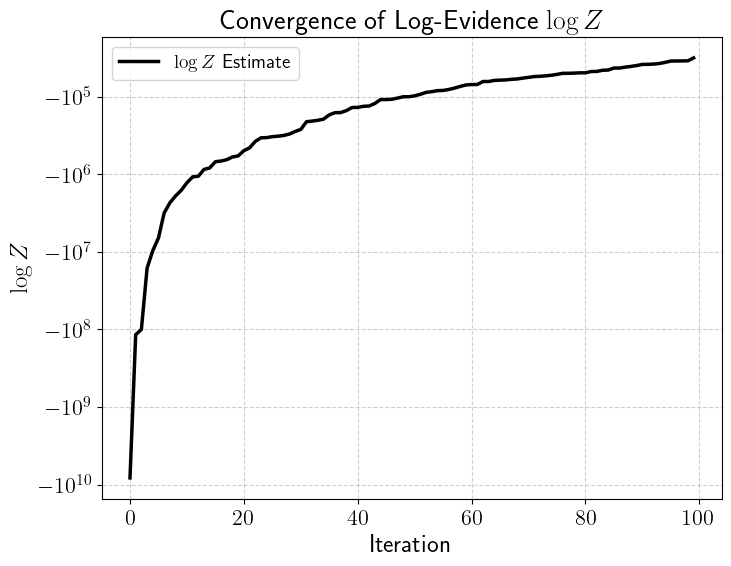

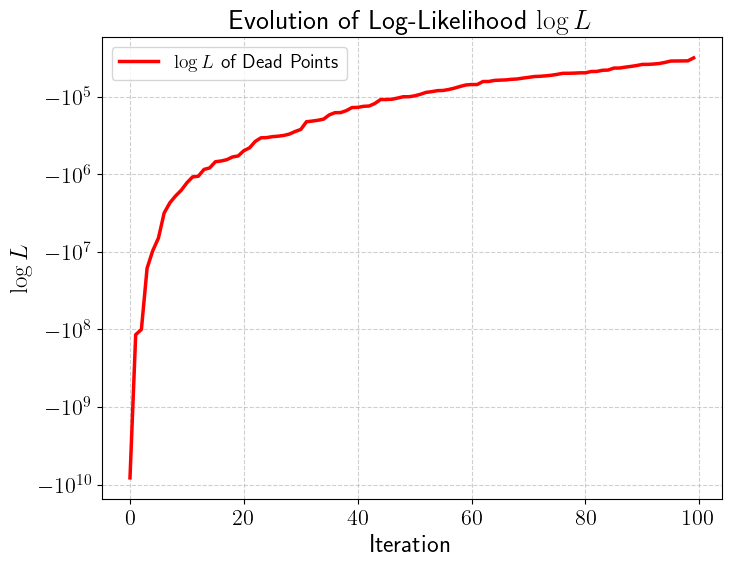

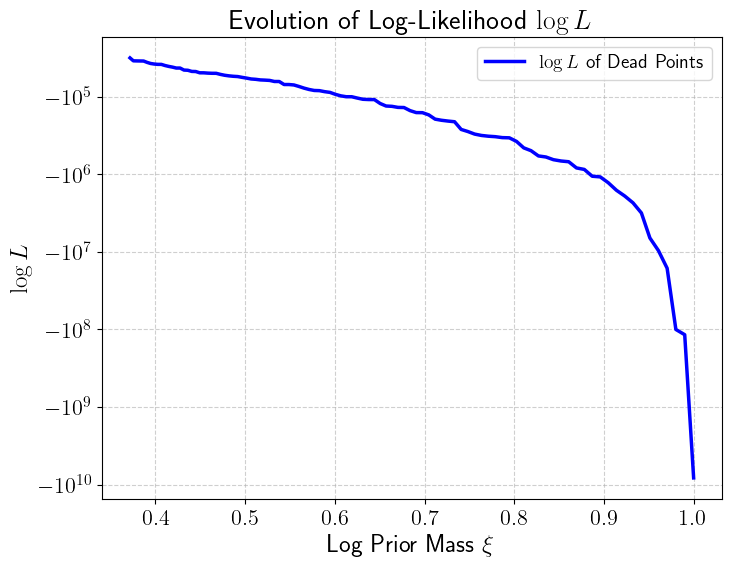

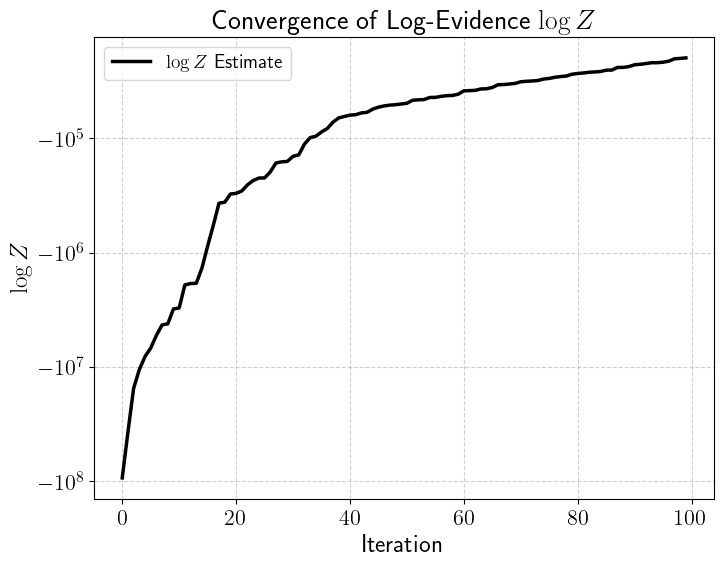

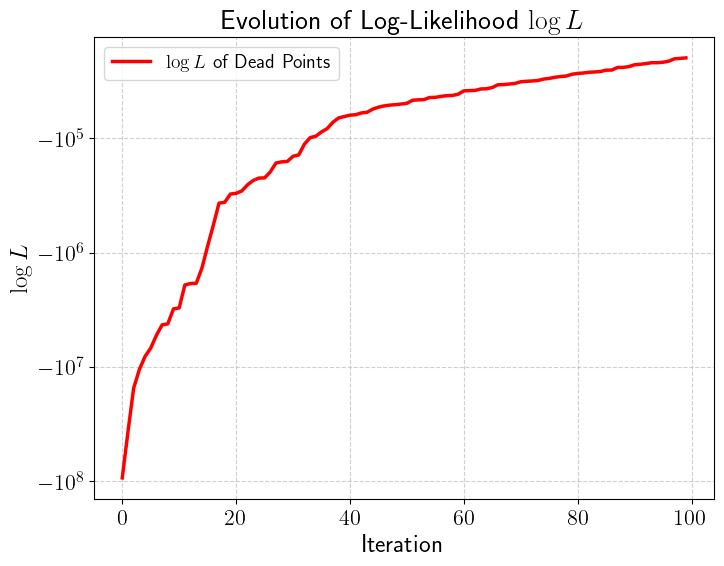

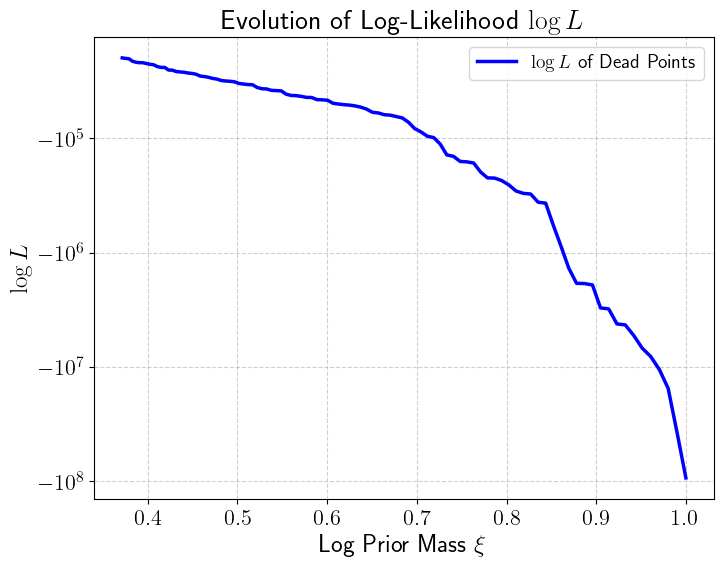

In [7]:
plot_nested_sampling(filtered_results)
plot_nested_sampling(filtered_results2)

In [46]:
for i in range(len(sampler['samples'])):
    print(sampler['samples'][i][0])

343.37945556640625
349.07183837890625
345.5719299316406
346.99603271484375
356.8706359863281
350.7834777832031
353.8126220703125
361.2939147949219
367.8162841796875
357.24261474609375
340.6138916015625
362.09246826171875
345.3359069824219
364.58343505859375
367.9516906738281
343.9778747558594
366.7186584472656
352.71099853515625
346.99755859375
352.29827880859375
343.0821838378906
343.4627685546875
343.3385009765625
361.9331359863281
348.4912414550781
340.6114501953125
341.22418212890625
348.86968994140625
354.4564514160156
355.3268737792969
356.4606628417969
365.0143737792969
349.13482666015625
356.8693542480469
356.564453125
368.026123046875
356.6140441894531
352.7115173339844
363.5681457519531
351.70892333984375
347.4593505859375
362.2284851074219
367.8184814453125
363.2836608886719
368.94921875
366.8895263671875
354.1280822753906
353.4918212890625
360.3395690917969
359.3348083496094
365.3611755371094
366.5311279296875
341.31158447265625
367.40020751953125
352.6087341308594
364.1771

[ 0.     -0.0001 -0.0002 -0.0003 -0.0004 -0.0005 -0.0006 -0.0007 -0.0008
 -0.0009 -0.001  -0.0011 -0.0012 -0.0013 -0.0014 -0.0015 -0.0016 -0.0017
 -0.0018 -0.0019 -0.002  -0.0021 -0.0022 -0.0023 -0.0024 -0.0025 -0.0026
 -0.0027 -0.0028 -0.0029 -0.003  -0.0031 -0.0032 -0.0033 -0.0034 -0.0035
 -0.0036 -0.0037 -0.0038 -0.0039 -0.004  -0.0041 -0.0042 -0.0043 -0.0044
 -0.0045 -0.0046 -0.0047 -0.0048 -0.0049 -0.005  -0.0051 -0.0052 -0.0053
 -0.0054 -0.0055 -0.0056 -0.0057 -0.0058 -0.0059 -0.006  -0.0061 -0.0062
 -0.0063 -0.0064 -0.0065 -0.0066 -0.0067 -0.0068 -0.0069 -0.007  -0.0071
 -0.0072 -0.0073 -0.0074 -0.0075 -0.0076 -0.0077 -0.0078 -0.0079 -0.008
 -0.0081 -0.0082 -0.0083 -0.0084 -0.0085 -0.0086 -0.0087 -0.0088 -0.0089
 -0.009  -0.0091 -0.0092 -0.0093 -0.0094 -0.0095 -0.0096 -0.0097 -0.0098
 -0.0099 -0.01   -0.0101 -0.0102 -0.0103 -0.0104 -0.0105 -0.0106 -0.0107
 -0.0108 -0.0109 -0.011  -0.0111 -0.0112 -0.0113 -0.0114 -0.0115 -0.0116
 -0.0117 -0.0118 -0.0119 -0.012  -0.0121 -0.0122 -0.

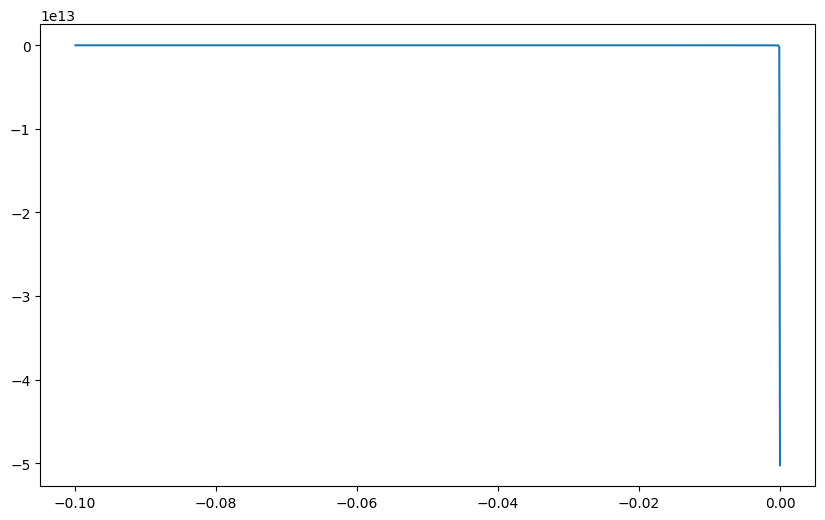

In [ ]:
import numpy as np
x = np.array(sampler['log_Xs'])[1:]
y = np.array(sampler['logLs'])[:]
# Graph plotted 
print(sampler[]
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.show()




In [5]:
print(sampler["logLs"])

[np.float32(-30786701000.0), np.float32(-8221116000.0), np.float32(-3411063600.0), np.float32(-117238650.0), np.float32(-104228660.0), np.float32(-100384536.0), np.float32(-51952936.0), np.float32(-51630936.0), np.float32(-43504260.0), np.float32(-32693320.0), np.float32(-32425710.0), np.float32(-27447532.0), np.float32(-21467874.0), np.float32(-16302232.0), np.float32(-15452338.0), np.float32(-9060085.0), np.float32(-7644093.5), np.float32(-6638674.0), np.float32(-6393854.5), np.float32(-6283912.0), np.float32(-6192011.5), np.float32(-6048730.0), np.float32(-5933064.0), np.float32(-5927399.0), np.float32(-5845751.0), np.float32(-5465627.0), np.float32(-5418329.0), np.float32(-5138822.0), np.float32(-5065501.0), np.float32(-4720396.0), np.float32(-4546125.0), np.float32(-4380993.0), np.float32(-4350203.0), np.float32(-3846407.2), np.float32(-3635229.5), np.float32(-3590678.8), np.float32(-3166706.8), np.float32(-3160886.0), np.float32(-3084760.0), np.float32(-2954575.2), np.float32(-26

In [6]:
results = sampler.results

2025-03-08 19:31:52,300 - INFO - Loaded posterior data from NetCDF file.
2025-03-08 19:31:52,393 - INFO - NOTE: When comparing the results to the paper, the section indexes are not comparable, but there order is


,median,68%,90%,95%,99%
parameter,,,,,
N,355.311,+1.3720 − 1.4230,+2.3090 − 2.3400,+2.7550 − 2.7340,+3.5340 − 3.6060
alpha[0],3.740,+0.0010 − 0.0010,+0.0020 − 0.0020,+0.0020 − 0.0020,+0.0030 − 0.0030
alpha[1],-2.542,+0.0030 − 0.0040,+0.0050 − 0.0060,+0.0060 − 0.0070,+0.0080 − 0.0090
alpha[2],-2.540,+0.0030 − 0.0040,+0.0060 − 0.0060,+0.0070 − 0.0070,+0.0090 − 0.0090
alpha[3],-2.559,+0.0150 − 0.0150,+0.0250 − 0.0250,+0.0300 − 0.0300,+0.0390 − 0.0390
alpha[4],-2.549,+0.0290 − 0.0300,+0.0490 − 0.0490,+0.0570 − 0.0590,+0.0780 − 0.0810
alpha[5],-2.579,+0.0070 − 0.0080,+0.0120 − 0.0130,+0.0150 − 0.0150,+0.0210 − 0.0190
r,77.351,+0.2730 − 0.2920,+0.4740 − 0.4650,+0.5710 − 0.5700,+0.7250 − 0.7300
sigma_r,0.029,+0.0020 − 0.0030,+0.0040 − 0.0040,+0.0050 − 0.0050,+0.0070 − 0.0060


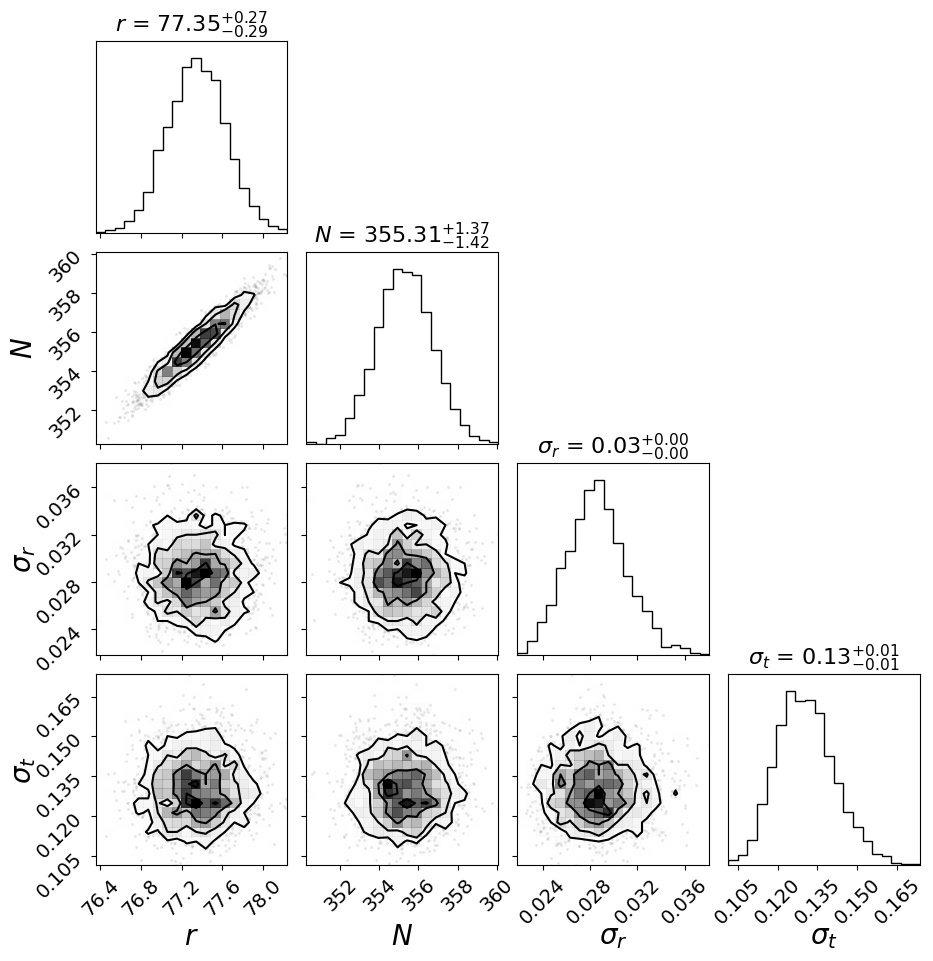

In [2]:
model.thinned_hcm_analysis('temp_data/mcmc_samples.nc', summary_table=True, corner_plot=["r", "N", "sigma_r", "sigma_t"])

2025-03-08 19:31:55,627 - INFO - Loaded thinned posterior data from NetCDF file.
2025-03-08 19:31:55,628 - INFO - Loaded posterior data from NetCDF file.


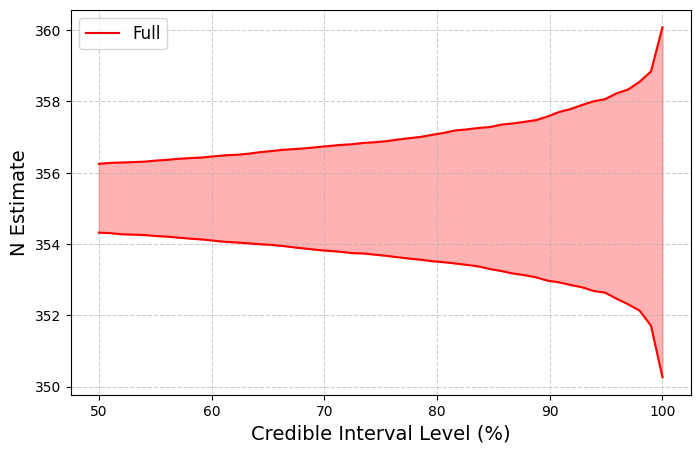

In [ ]:
model.plot_credible_intervals('temp_data/mcmc_samples.nc', param="N", percentiles_range=(50, 100))

In [4]:
best_params = {'Step Size': 1.0, 'Acceptance Probability': 0.9, 'Dense Mass Matrix': False, 'Autocorrolation Length': 1.8840452471041447, 'Number Effective Samples': 1061.5456306445308, 'GR Statistic': 1.002272325030495, 'Time per iteration': 0.01623126657803853, 'Time per Effective Sample': 0.03058044065083385}
combined_samples = model.run_hmc_optimised(best_params, burnin_period=1000, n_samples=2000, n_chains = 3, random_seed=0, save_path='temp_data/mcmc_samples.nc')

2025-03-08 18:10:22,362 - INFO - Running MCMC with Optimised Hyperparameters: step_size=1.0, accept_prob=0.9, dense_mass=False
Due to Autocorrelation Length: 2, the number of effective samples is reduced.
Total samples required to achieve 2000 effective samples: 3999
This is run on 3 parrallel chains each running 1333 samples.


  0%|          | 0/2333 [00:00<?, ?it/s]

  0%|          | 0/2333 [00:00<?, ?it/s]

  0%|          | 0/2333 [00:00<?, ?it/s]

2025-03-08 18:11:44,944 - INFO -  MCMC samples saved to temp_data/mcmc_samples.nc
2025-03-08 18:11:44,945 - INFO - Total MCMC Run Time: 80.28 seconds 
 Non Burn-In Run Time: 45.87 seconds
2025-03-08 18:11:45,175 - INFO -  Over 3 chains, 3999 were run, 
Achieved Gelman-Rubin Statistic: 1.0035, 
Achieved Effective Samples: 2255, 
True Auto-correlation Length: 2
2025-03-08 18:11:45,178 - INFO - Total samples remaining after thinning: 2001
2025-03-08 18:11:50,936 - INFO - Full MCMC samples saved to temp_data/mcmc_samples.nc
 Thinned MCMC samples saved to temp_data/mcmc_samples_thinned.nc


In [ ]:
import arviz as az
import os
# Check if posterior_data is an InferenceData object, otherwise attempt to load it
posterior_data = 'temp_data/mcmc_samples.nc'
if not isinstance(posterior_data, az.InferenceData):
    if isinstance(posterior_data, str) and os.path.isfile(posterior_data):
            posterior_data_path = posterior_data
            thinned_posterior_path = posterior_data_path.replace(".nc", "_thinned.nc")
            posterior_data = az.from_netcdf(posterior_data)
            thinned_posterior_data = az.from_netcdf(thinned_posterior_path)

    else:
        raise TypeError("posterior_data must be an ArviZ InferenceData object or a valid NetCDF file path.")
else:
    thinned_posterior_data = None